# Implementing linear regression to predict Individual medical costs billed by health insurance implemntation of linear regression

In [214]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Implmentation of linear regression

In [215]:
#function of linear regression 
def fit_linear_regression(X, Y, learning_rate, iterations):
    m, n = X.shape
    W = np.zeros((n,1))
    b = 0

    for i in range(iterations):
        Y_pred = predict_linear_regression(X, W, b)
        dW = - (2 * np.dot(X.T, Y - Y_pred)) / m
        db = - 2 * np.sum(Y - Y_pred) / m
        W -= learning_rate * dW
        b -= learning_rate * db

    return W, b


In [216]:
#function of prediction
def predict_linear_regression(X, W, b):
    return np.dot(X, W) + b

In [217]:
# normalization function should be used instead of standard scalling
def normalize_features(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    normalized_X = (X - means) / stds
    return normalized_X,means,stds

In [218]:
# to cancel the effect of normalization to represent the actual data
def denormalization(normalized_x,mean_x,std_x):
    denormalized_x=(normalized_x*std_x)+mean_x.flatten()
    return denormalized_x

In [219]:
#function to calculate r2 score
def r2_score(y, y_predict):
    mean_actual = np.mean(y)
    ssr = np.sum((y - y_predict) ** 2)
    sst = np.sum((y - mean_actual) ** 2)
    r2 = 1 - (ssr / sst)
    return r2

In [220]:
#function to calculate mean square error 
def mean_sqrt_error(y, y_pred):
    return np.mean(np.square(y - y_pred))

# Import data

In [221]:
df=pd.read_csv("insurance.csv")

# Data Preparation

In [222]:
# convert string into numirc data values using encode 
df['smoker'] = le.fit_transform(df['smoker'])
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])

In [223]:
# spllitng data 
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [224]:
# Normalize the input features
x_normalizaed, x_mean, x_std = normalize_features(X)
y_normalized, y_mean, y_std = normalize_features(Y.reshape(-1, 1))

In [225]:
# set learning rate and number of iterations 
learning_rate = 0.001
iterations = 1000

In [226]:
# Get weights and bias
W, b = fit_linear_regression(x_normalizaed, y_normalized, learning_rate, iterations)
Y_pred = predict_linear_regression(x_normalizaed, W, b)

In [227]:
print("Predicted values:", np.round(Y_pred[:3], 2))
print("Real values:", Y_test[:3])
print("Trained W:", W)
print("Trained b:", b)

Predicted values: [[ 0.82]
 [-0.66]
 [-0.42]]
Real values: [ 9724.53     8547.6913  45702.02235]
Trained W: [[ 0.25758991]
 [ 0.01204144]
 [ 0.15144114]
 [ 0.04631775]
 [ 0.68362955]
 [-0.02214987]]
Trained b: -2.7646046886742136e-17


# Evalute the model

In [228]:
# calculate mean square error
mean_square_error=mean_sqrt_error(y_normalized,Y_pred)
mean_square_error

0.2634000367224449

In [229]:
#calculate r2 score 
r2_score=r2_score(y_normalized,Y_pred)
r2_score

0.7365999632775551

# Plotting actual data with linear regression line

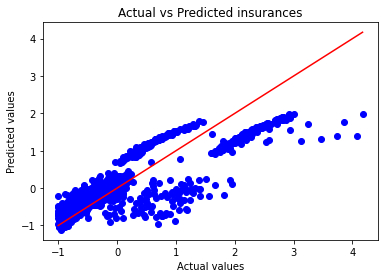

In [230]:
# let's represent the linear reg function
plt.scatter(y_normalized, Y_pred, color='blue', label='Actual')
plt.plot([min(y_normalized), max(y_normalized)], [min(y_normalized), max(y_normalized)], color='red', label='Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted insurances')
plt.show()

# Denormalization 

In [231]:
#denormlization the output to represent the actual values
y_denormalized=denormalization(y_normalized,y_mean,y_std)
y_pred_denormalized=denormalization(Y_pred,y_mean,y_std)

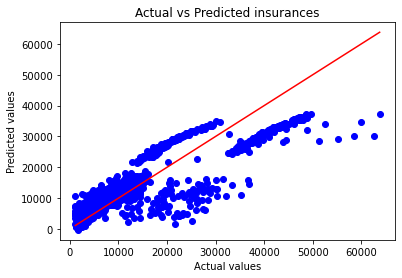

In [232]:
plt.scatter(y_denormalized, y_pred_denormalized, color='blue', label='Actual')
plt.plot([min(y_denormalized), max(y_denormalized)], [min(y_denormalized), max(y_denormalized)], color='red', label='Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted insurances')
plt.show()